In [111]:
import nltk
from nltk.tokenize import sent_tokenize,word_tokenize
import matplotlib.pyplot as plt

In [92]:
text="""Hello Mr. Smith, how are you doing today? The weather is great, and city is awesome.
The sky is pinkish blue. You shouldn't eat cardboard"""
tokenized_text = sent_tokenize(text)
print(tokenized_text)

['Hello Mr. Smith, how are you doing today?', 'The weather is great, and city is awesome.', 'The sky is pinkish blue.', "You shouldn't eat cardboard"]


In [93]:
words = nltk.word_tokenize(text)
print(words)

['Hello', 'Mr.', 'Smith', ',', 'how', 'are', 'you', 'doing', 'today', '?', 'The', 'weather', 'is', 'great', ',', 'and', 'city', 'is', 'awesome', '.', 'The', 'sky', 'is', 'pinkish', 'blue', '.', 'You', 'should', "n't", 'eat', 'cardboard']


In [94]:
fdist = nltk.FreqDist(words)
d = dict(fdist)
print(fdist.most_common(4))
d

[('is', 3), (',', 2), ('The', 2), ('.', 2)]


{'Hello': 1,
 'Mr.': 1,
 'Smith': 1,
 ',': 2,
 'how': 1,
 'are': 1,
 'you': 1,
 'doing': 1,
 'today': 1,
 '?': 1,
 'The': 2,
 'weather': 1,
 'is': 3,
 'great': 1,
 'and': 1,
 'city': 1,
 'awesome': 1,
 '.': 2,
 'sky': 1,
 'pinkish': 1,
 'blue': 1,
 'You': 1,
 'should': 1,
 "n't": 1,
 'eat': 1,
 'cardboard': 1}

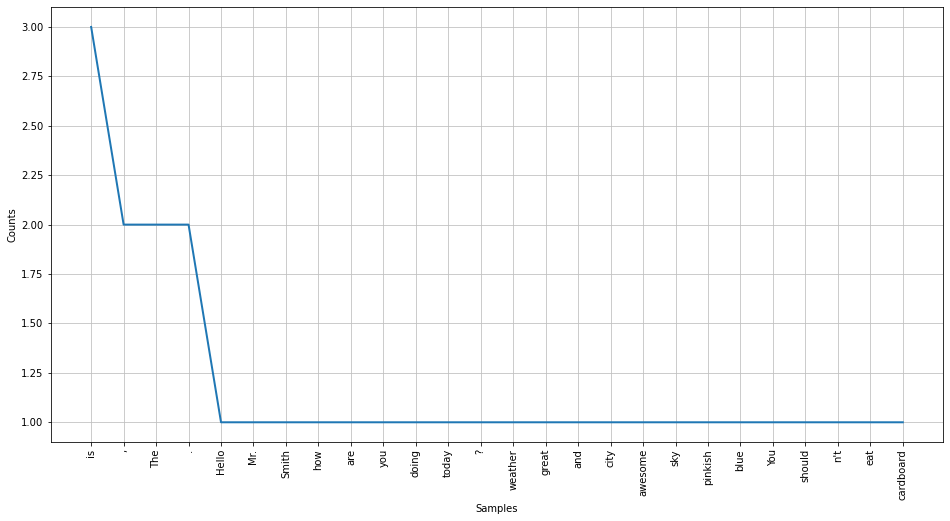

In [95]:
plt.figure(figsize=(16,8))
fdist.plot(30,cumulative=False)
plt.show()

**Language Change**

In [96]:
mytext = "Bonjour M. Adam, comment allez vous? J'espère que tout va bien. Aujourd'hui est un bon jour."
print(sent_tokenize(mytext , "french"))

['Bonjour M. Adam, comment allez vous?', "J'espère que tout va bien.", "Aujourd'hui est un bon jour."]


# Stopwords

In [97]:
from nltk.corpus import stopwords,wordnet

In [98]:
stop_words = set(stopwords.words("english"))
print(stop_words)

{'because', 'mustn', 'be', 'did', 'a', 'further', 'hasn', 'haven', 'if', 'are', 'before', 'was', 'couldn', 'you', 'hers', 'out', 'again', 'nor', 'so', 'few', "won't", 'o', 'what', 'me', 'who', 'your', "she's", 'most', 'over', 'too', 'where', 'didn', 'from', 'then', 'doesn', 'when', 'now', "wasn't", 'does', "hadn't", 'm', 'more', 'why', 'they', 'shouldn', 'itself', 'ours', 'our', 'myself', 'theirs', 'own', 'wasn', 'she', 'until', 'ain', 't', 'which', 'any', 'above', "haven't", 'by', 'below', 'should', 've', 'in', 'has', "doesn't", 'aren', 'will', 'doing', 'against', 'into', 'yourself', "should've", 'whom', "couldn't", 'for', 'my', 'here', 'not', 'and', "mightn't", 'himself', 'or', "needn't", 'down', 'no', 'very', 'her', "didn't", "that'll", 'is', 'once', 'as', 'both', "shouldn't", 'themselves', 'to', 'herself', 'its', 'but', 'off', 'their', 'won', 'been', 'about', 'he', 's', "you're", 'hadn', 'his', 'of', 'do', 'while', "isn't", 'shan', "you've", 'there', 'd', 'than', "hasn't", 'the', "

In [99]:
filtered_sent=[]
for word in words:
    if word not in stop_words:
        filtered_sent.append(word)
print("Unfiltered text: ",words)
print("Filtered Text:",filtered_sent)

Unfiltered text:  ['Hello', 'Mr.', 'Smith', ',', 'how', 'are', 'you', 'doing', 'today', '?', 'The', 'weather', 'is', 'great', ',', 'and', 'city', 'is', 'awesome', '.', 'The', 'sky', 'is', 'pinkish', 'blue', '.', 'You', 'should', "n't", 'eat', 'cardboard']
Filtered Text: ['Hello', 'Mr.', 'Smith', ',', 'today', '?', 'The', 'weather', 'great', ',', 'city', 'awesome', '.', 'The', 'sky', 'pinkish', 'blue', '.', 'You', "n't", 'eat', 'cardboard']


In [100]:
syn = wordnet.synsets("pain")
print(syn[0].definition())
print(syn[0].examples())

a symptom of some physical hurt or disorder
['the patient developed severe pain and distension']


In [101]:
syn = wordnet.synsets("vision")
print(type(syn))
synynoms=[]
for s in syn:
    for lemma in s.lemmas():
        #print(type(lemma))
        synynoms.append(lemma.name())
print(synynoms)


<class 'list'>
['vision', 'sight', 'vision', 'visual_sense', 'visual_modality', 'vision', 'visual_sensation', 'imagination', 'imaginativeness', 'vision', 'vision']


**Antonyms**

In [102]:
ants=[]
ants2=[]
syn = wordnet.synsets("small")
for s in syn:
    for lemma in s.lemmas():
        if lemma.antonyms():
            print(type(lemma.antonyms()))
            ants2.append(lemma.antonyms())

            ants.append(lemma.antonyms()[0].name())
print(ants)

<class 'list'>
<class 'list'>
<class 'list'>
['large', 'big', 'big']


# NLTK Word Stemming

Word stemming means removing affixes from words and returning the root word. (The stem of the word working is work.)
• Search engines use this technique when indexing pages, so many people write different versions for the same word and all of them are stemmed to the root word
• NLTK has a class called PorterStemmer that uses this algorithm.

In [103]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
print(stemmer.stem("Playing"))

play


# Lemmatizing Words Using WordNet

Word lemmatizing is similar to stemming, but the difference is the
result of lemmatizing is a real word

In [104]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
print(lemmatizer.lemmatize("Increase"))
print(stemmer.stem("Increase"))

Increase
increas


If we try to lemmatize a word like “playing”, it will end up with the same word
–
This is because the default part of speech is nouns
–
To get verbs, adjective, or adverb, we should specify it (See Example)
–
Actually, this is a very good level of text compression.
–
We end up with about 50% to 60% compression

In [105]:
print(lemmatizer.lemmatize ('playing', pos="v"))
print(lemmatizer.lemmatize ('playing', pos="n"))
print(lemmatizer.lemmatize ('playing', pos="a"))
print(lemmatizer.lemmatize ('playing', pos="r"))

play
playing
playing
playing


# Part of speech tagging (POS)

Part of speech tagging is used to assign
parts of speech to each word of a given text
(such as nouns, verbs, pronouns, adverb,
conjunction, adjectives, interjection) based
on its definition and its context.

In [109]:
text = "vote to choose a particular man or a group (party) to represent them in parliament"
text = nltk.word_tokenize(text) #Tokenize the text
for token in text:
    print(nltk.pos_tag([token]))

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[('vote', 'NN')]
[('to', 'TO')]
[('choose', 'NN')]
[('a', 'DT')]
[('particular', 'JJ')]
[('man', 'NN')]
[('or', 'CC')]
[('a', 'DT')]
[('group', 'NN')]
[('(', '(')]
[('party', 'NN')]
[(')', ')')]
[('to', 'TO')]
[('represent', 'NN')]
[('them', 'PRP')]
[('in', 'IN')]
[('parliament', 'NN')]


# Named entity recognition

It is the process of detecting the named entities such as
the person name, the location name, the company name,
the quantities and the monetary value.

In [122]:
#nltk.download('maxent_ne_chunker')
#nltk.download('words')
text = "Google’s CEO Sundar Pichai introduced the new Pixel at Minnesota Roi Centre Event"
 #importing chunk library from nltk
from nltk import ne_chunk 
# tokenize and POS Tagging before doing chunk
token = word_tokenize(text)
tags = nltk.pos_tag (token)
chunk = ne_chunk (tags)
print(chunk.__repr__())

Tree('S', [Tree('PERSON', [('Google', 'NNP')]), ('’', 'NNP'), ('s', 'VBD'), Tree('ORGANIZATION', [('CEO', 'NNP'), ('Sundar', 'NNP'), ('Pichai', 'NNP')]), ('introduced', 'VBD'), ('the', 'DT'), ('new', 'JJ'), ('Pixel', 'NNP'), ('at', 'IN'), Tree('ORGANIZATION', [('Minnesota', 'NNP'), ('Roi', 'NNP'), ('Centre', 'NNP')]), ('Event', 'NNP')])


In [124]:
sentence = "the little yellow dog barked at the cat in front of LN:"
token = word_tokenize(sentence)
tags = nltk.pos_tag(token)
grammar = "NP: {<DT>?<JJ>*<NN>}"
cp = nltk.RegexpParser(grammar)
result = cp.parse(tags)
print (result)
result.draw()

(S
  (NP the/DT little/JJ yellow/JJ dog/NN)
  barked/VBD
  at/IN
  (NP the/DT cat/NN)
  in/IN
  (NP front/NN)
  of/IN
  LN/NNP
  :/:)


# One-hot encoding ( CountVectorizing )

The idea is to collect a set of documents (they can be words, sentences, paragraphs or
even articles) and count the occurrence of every word in them.
The columns of the resulting matrix are words and the rows are documents.

In [130]:
from sklearn.feature_extraction.text import CountVectorizer
text=["Hello Mr. Smith, how are you doing today?", "The weather is great, and city is awesome.", "The sky is pinkish blue. You shouldn't eat cardboard"]
vectorizer = CountVectorizer()
model = vectorizer.fit_transform(text)
print(vectorizer.get_feature_names())
print(model.toarray())


['and', 'are', 'awesome', 'blue', 'cardboard', 'city', 'doing', 'eat', 'great', 'hello', 'how', 'is', 'mr', 'pinkish', 'shouldn', 'sky', 'smith', 'the', 'today', 'weather', 'you']
[[0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 0 1 0 1]
 [1 0 1 0 0 1 0 0 1 0 0 2 0 0 0 0 0 1 0 1 0]
 [0 0 0 1 1 0 0 1 0 0 0 1 0 1 1 1 0 1 0 0 1]]


In [132]:
sample_text = ["One of the most basic ways we can numerically represent words"
"is through the one hot encoding method (also sometimes called" 
"count vectorizing)."]
# To actually create the vectorizer, we simply need to call fit on the text
# data that we wish to fix
vectorizer.fit(sample_text)
# Now, we can inspect how our vectorizer vectorized the text
# This will print out a list of words used, and their index in the vectors
print('Vocabulary: ')
print(vectorizer.vocabulary_)

Vocabulary: 
{'one': 10, 'of': 9, 'the': 13, 'most': 7, 'basic': 1, 'ways': 16, 'we': 17, 'can': 3, 'numerically': 8, 'represent': 11, 'wordsis': 18, 'through': 14, 'hot': 5, 'encoding': 4, 'method': 6, 'also': 0, 'sometimes': 12, 'calledcount': 2, 'vectorizing': 15}


In [135]:
# If we would like to actually create a vector, we can do so by passing the
# text into the vectorizer to get back counts
vector = vectorizer.transform(sample_text)
# Our final vector:
print('Full vector: ')
print(vector.toarray())
# Or if we wanted to get the vector for one word:
print('Hot vector: ')
print(vectorizer.transform(['hot']).toarray())
# Or if we wanted to get multiple vectors at once to build matrices
print('Hot, one and Today: ')
print(vectorizer.transform (['hot', 'one', 'method']).toarray())

Full vector: 
[[1 1 1 1 1 1 1 1 1 1 2 1 1 2 1 1 1 1 1]]
Hot vector: 
[[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]]
Hot, one and Today: 
[[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]]


# Word Frequencies with TfidfVectorizer

**TF = (no. of times the word appears in a doc)/(number of words in that doc)**

** IDF = log(Total no of docs/no of docs containing the word)**

**weight(word) = tf*idf**

In [139]:
from sklearn.feature_extraction.text import TfidfVectorizer
# list of text documents
text = ["The quick brown fox jumped over the lazy dog.",
"The dog.",
"The fox"]
# create the transform
vectorizer = TfidfVectorizer()
# tokenize and build vocab
vectorizer.fit(text)
# summarize
print(vectorizer.vocabulary_)
print(vectorizer.idf_)
# encode document
vector = vectorizer.transform([text[0]])
# summarize encoded vector
print(vector.shape)
print(vector.toarray())

{'the': 7, 'quick': 6, 'brown': 0, 'fox': 2, 'jumped': 3, 'over': 5, 'lazy': 4, 'dog': 1}
[1.69314718 1.28768207 1.28768207 1.69314718 1.69314718 1.69314718
 1.69314718 1.        ]
(1, 8)
[[0.36388646 0.27674503 0.27674503 0.36388646 0.36388646 0.36388646
  0.36388646 0.42983441]]
